Expected value for 20 flips: 9.4923
EXpected value for 40 flips: 19.4945
Variance for p = 0.01: 1.00639744
Mean for p = 0.01: 0.9984


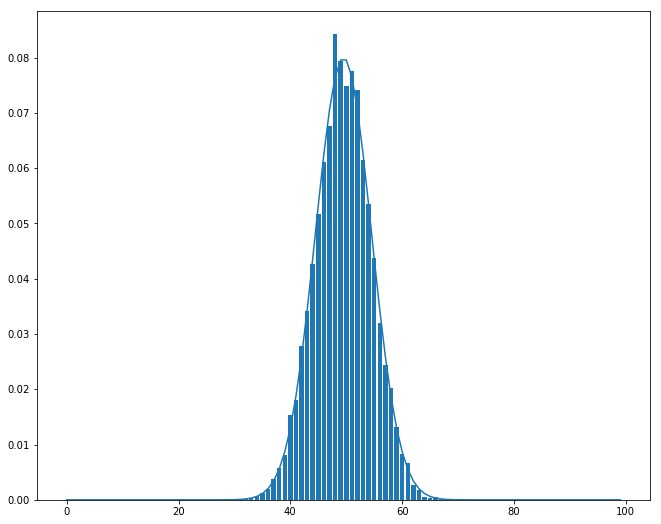

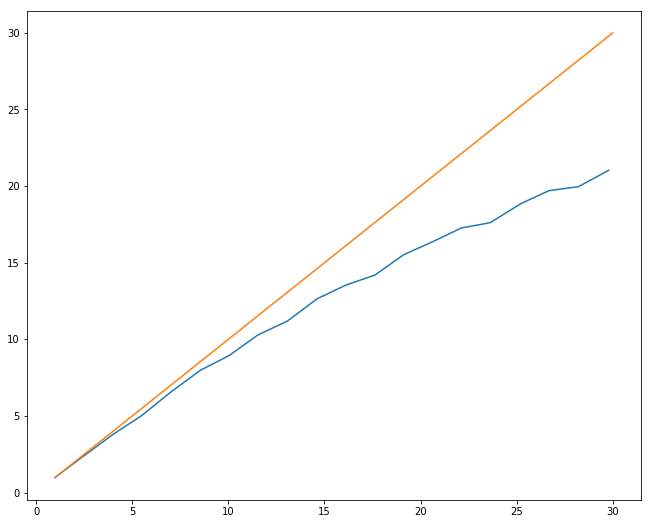

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.misc import comb

%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure



def Probs(x, m):
    return (x/m)

def PNx(N, p):
    x = np.arange(N+1)
    pnx = np.zeros(N+1)
    for i in range(0,N-1):
        pnx[i] = (comb(N,i))*(p**x[i])*((1-p)**(N-x[i]))
    return pnx

def ev(counts, m):
    val = 0
    prob = Probs(counts, m)
    for i in range(0,len(counts)):
        val += i*prob[i]
    return val

def flipCoins(N, m, p):
    counts = np.zeros(N)
    for i in range(0,m):
        heads_count = 0
        for k in range(0,N-1):
            temp = np.random.random()
            if (temp < p):
                heads_count +=1
        counts[heads_count] = counts[heads_count] + 1
    return counts

def nthMoment(counts, m, n):
    val = 0
    prob = Probs(counts, m)
    for i in range(len(counts)):
        val += (i**n)*prob[i]
    return val

def var(counts, m):
    var = 0
    var = nthMoment(counts, m, 2) - (nthMoment(counts, m, 1))**2
    return var
        
#code for plot        
N = 100
m = 10000
p = .5
plt.figure(1)
counts = flipCoins(N, m, p)
        
probs = Probs(counts, m)
       
plt.bar(np.arange(N), counts/m)
plt.plot(np.arange(N), PNx(N-1, p))
#code for expected valuen test of N = 20 and N = 40
counts20 = flipCoins(20, m, p)
counts40 = flipCoins(40, m, p)
print("Expected value for 20 flips:",ev(counts20, m))
print("EXpected value for 40 flips:",ev(counts40, m))
#code for variance of p = 0.01
countsProb = flipCoins(N, m , .01)
print("Variance for p = 0.01:",var(countsProb, m))
print("Mean for p = 0.01:", nthMoment(countsProb, m, 1))


pvals = np.linspace(0.01, 0.3, 20)
variances = np.zeros(len(pvals))
means = np.zeros(len(pvals))
theo = np.zeros(len(pvals))
for i in range (len(pvals)):
                
    countsHolder = flipCoins(N, m, pvals[i])
    variances[i] = var(countsHolder, m)
    means[i] = nthMoment(countsHolder, m, 1)
    theo[i] = N*pvals[i]
                
plt.figure(2)
plt.plot(means, variances)
plt.plot(theo, theo)